# Tiny ImageNet

## Imports

In [1]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt


import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler



import models

print("Python: %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

# determine device to run network on (runs on gpu if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Python: 3.6.5 (default, Jun 21 2018, 23:07:39) 
[GCC 5.4.0 20160609]
Pytorch: 0.4.0


## Hyperparameters

In [2]:
n_epochs = 50
batch_size = 128
lr = 0.001
k = 3

net = models.tiny_cnn(n_in=3, n_out=200, n_hidden=128, size=64).to(device)


## Load Tiny ImageNet
### https://tiny-imagenet.herokuapp.com/

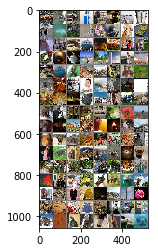

In [3]:
train_dir = "datasets/tiny-imagenet-200/train"
test_dir = "datasets/tiny-imagenet-200/val"


# Data augmentation 
train_transform = torchvision.transforms.Compose([
    #torchvision.transforms.RandomRotation(10),
    #torchvision.transforms.RandomHorizontalFlip(),
    #torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = torchvision.transforms.Compose([
    #torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
    



# load training set 
trainset = torchvision.datasets.ImageFolder(train_dir, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# load test set 
testset = torchvision.datasets.ImageFolder(test_dir, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# helper function to unnormalize and plot image 
def imshow(img):
    img = np.array(img)
    img = img / 2 + 0.5
    img = np.moveaxis(img, 0, -1)
    plt.imshow(img)
    
# display sample from dataset 
imgs,labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))  

In [4]:
def eval_net(net): 
    
    class_correct = np.zeros(10)
    class_total = np.zeros(10)
    total = 0
    correct = 0
    with torch.no_grad():
        net.eval()
        for i, (imgs, lbls) in enumerate(testloader):
            
            imgs, lbls = imgs.to(device), lbls.to(device)
            
            output = net(imgs)
            
            predicted = output.argmax(dim=1)
            
            total += imgs.size(0)
            correct += predicted.eq(lbls).sum().item()
            
            
#             for prediction, lbl in zip(predicted, lbls): 
            
#                 class_correct[lbl] += prediction == lbl
#                 class_total[lbl] += 1 
            
#     for i in range(10):
#         print('Accuracy of %s : %.2f %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
    
    print("\nTotal accuracy = %.2f %%\n\n" % (100*(correct/total)) )
    


In [5]:

total_size = len(trainset)



net.apply(models.weights_init)

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)




def train(net, data_loader, optimizer, criterion, n_epochs): 
    losses = []
    for epoch in range(n_epochs): 
        net.train()
        for i, batch in enumerate(data_loader): 

            imgs, labels = batch
            imgs, labels = imgs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = net(imgs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            losses.append(loss.item())

            print("[%d/%d][%d/%d] loss = %f" % (epoch, n_epochs, i, len(data_loader), loss.item()))

        # evaluate performance on testset at the end of each epoch 
        print("[%d/%d]" %(epoch, n_epochs))
        eval_net(net)

        #plt.plot(losses)
        #plt.show()



In [ ]:
train(net, trainloader, optimizer, loss, n_epochs)

[0/50][0/782] loss = 6.150023
[0/50][1/782] loss = 31.685732
[0/50][2/782] loss = 46.628239
[0/50][3/782] loss = 53.251316
[0/50][4/782] loss = 53.559753
[0/50][5/782] loss = 45.785866
[0/50][6/782] loss = 42.340885
[0/50][7/782] loss = 50.935356
[0/50][8/782] loss = 49.944046
[0/50][9/782] loss = 48.053734
[0/50][10/782] loss = 42.394573
[0/50][11/782] loss = 44.998989
[0/50][12/782] loss = 40.711449
[0/50][13/782] loss = 39.958141
[0/50][14/782] loss = 42.533962
[0/50][15/782] loss = 34.515369
[0/50][16/782] loss = 28.490728
[0/50][17/782] loss = 31.044533
[0/50][18/782] loss = 29.195496
[0/50][19/782] loss = 28.802504
[0/50][20/782] loss = 25.607460
[0/50][21/782] loss = 23.514549
[0/50][22/782] loss = 24.070587
[0/50][23/782] loss = 21.326780
[0/50][24/782] loss = 16.846516
[0/50][25/782] loss = 16.481964
[0/50][26/782] loss = 17.936594
[0/50][27/782] loss = 16.396776
[0/50][28/782] loss = 14.511685
[0/50][29/782] loss = 13.309681
[0/50][30/782] loss = 15.017244
[0/50][31/782] loss

[0/50][260/782] loss = 6.187580
[0/50][261/782] loss = 6.013865
[0/50][262/782] loss = 6.215290
[0/50][263/782] loss = 5.981472
[0/50][264/782] loss = 5.891414
[0/50][265/782] loss = 6.035009
[0/50][266/782] loss = 6.180675
[0/50][267/782] loss = 5.861447
[0/50][268/782] loss = 6.249993
[0/50][269/782] loss = 6.087882
[0/50][270/782] loss = 5.990530
[0/50][271/782] loss = 6.016209
[0/50][272/782] loss = 6.199059
[0/50][273/782] loss = 6.085812
[0/50][274/782] loss = 6.373859
[0/50][275/782] loss = 6.029012
[0/50][276/782] loss = 5.966741
[0/50][277/782] loss = 5.867492
[0/50][278/782] loss = 5.873019
[0/50][279/782] loss = 5.889998
[0/50][280/782] loss = 6.378812
[0/50][281/782] loss = 6.229075
[0/50][282/782] loss = 6.601568
[0/50][283/782] loss = 6.375097
[0/50][284/782] loss = 6.422046
[0/50][285/782] loss = 6.372023
[0/50][286/782] loss = 6.381301
[0/50][287/782] loss = 5.897350
[0/50][288/782] loss = 6.414207
[0/50][289/782] loss = 6.077705
[0/50][290/782] loss = 6.235455
[0/50][2

[0/50][518/782] loss = 4.677143
[0/50][519/782] loss = 5.253609
[0/50][520/782] loss = 4.984528
[0/50][521/782] loss = 4.804849
[0/50][522/782] loss = 4.956213
[0/50][523/782] loss = 4.648688
[0/50][524/782] loss = 5.287416
[0/50][525/782] loss = 5.105793
[0/50][526/782] loss = 4.700147
[0/50][527/782] loss = 4.809619
[0/50][528/782] loss = 4.710430
[0/50][529/782] loss = 4.767653
[0/50][530/782] loss = 5.095905
[0/50][531/782] loss = 4.754145
[0/50][532/782] loss = 4.793079
[0/50][533/782] loss = 4.751703
[0/50][534/782] loss = 4.640378
[0/50][535/782] loss = 4.742614
[0/50][536/782] loss = 4.998684
[0/50][537/782] loss = 4.872600
[0/50][538/782] loss = 4.679599
[0/50][539/782] loss = 4.689881
[0/50][540/782] loss = 4.898678
[0/50][541/782] loss = 4.681480
[0/50][542/782] loss = 5.211858
[0/50][543/782] loss = 4.725750
[0/50][544/782] loss = 4.529789
[0/50][545/782] loss = 4.662470
[0/50][546/782] loss = 4.888358
[0/50][547/782] loss = 5.172163
[0/50][548/782] loss = 4.664947
[0/50][5

[0/50][775/782] loss = 4.569680
[0/50][776/782] loss = 4.720872
[0/50][777/782] loss = 4.587043
[0/50][778/782] loss = 4.549967
[0/50][779/782] loss = 4.270405
[0/50][780/782] loss = 4.332709
[0/50][781/782] loss = 5.013838
[0/50]

Total accuracy = 0.74 %


[1/50][0/782] loss = 4.456931
[1/50][1/782] loss = 4.620349
[1/50][2/782] loss = 4.560695
[1/50][3/782] loss = 4.483554
[1/50][4/782] loss = 4.250986
[1/50][5/782] loss = 4.438980
[1/50][6/782] loss = 4.564728
[1/50][7/782] loss = 4.471298
[1/50][8/782] loss = 4.412395
[1/50][9/782] loss = 4.364072
[1/50][10/782] loss = 4.574470
[1/50][11/782] loss = 4.337759
[1/50][12/782] loss = 4.270200
[1/50][13/782] loss = 4.115905
[1/50][14/782] loss = 4.405072
[1/50][15/782] loss = 4.390392
[1/50][16/782] loss = 4.416286
[1/50][17/782] loss = 4.246387
[1/50][18/782] loss = 4.320673
[1/50][19/782] loss = 4.159799
[1/50][20/782] loss = 4.384017
[1/50][21/782] loss = 4.387850
[1/50][22/782] loss = 4.343565
[1/50][23/782] loss = 4.345100
[1/50][2

[1/50][252/782] loss = 4.297581
[1/50][253/782] loss = 3.969996
[1/50][254/782] loss = 4.066046
[1/50][255/782] loss = 3.966835
[1/50][256/782] loss = 4.099558
[1/50][257/782] loss = 4.154234
[1/50][258/782] loss = 4.430874
[1/50][259/782] loss = 4.123064
[1/50][260/782] loss = 3.917664
[1/50][261/782] loss = 4.046114
[1/50][262/782] loss = 4.183512
[1/50][263/782] loss = 4.123776
[1/50][264/782] loss = 4.274735
[1/50][265/782] loss = 3.811539
[1/50][266/782] loss = 4.036983
[1/50][267/782] loss = 3.906267
[1/50][268/782] loss = 4.095647
[1/50][269/782] loss = 3.938023
[1/50][270/782] loss = 4.412744
[1/50][271/782] loss = 4.052588
[1/50][272/782] loss = 4.001426
[1/50][273/782] loss = 3.865821
[1/50][274/782] loss = 4.156616
[1/50][275/782] loss = 4.124106
[1/50][276/782] loss = 4.100691
[1/50][277/782] loss = 3.731394
[1/50][278/782] loss = 4.166131
[1/50][279/782] loss = 4.218678
[1/50][280/782] loss = 3.985647
[1/50][281/782] loss = 4.582052
[1/50][282/782] loss = 4.131944
[1/50][2

[1/50][510/782] loss = 4.028936
[1/50][511/782] loss = 3.853835
[1/50][512/782] loss = 4.051476
[1/50][513/782] loss = 3.842468
[1/50][514/782] loss = 4.118317
[1/50][515/782] loss = 4.115599
[1/50][516/782] loss = 3.948380
[1/50][517/782] loss = 3.996640
[1/50][518/782] loss = 3.911377
[1/50][519/782] loss = 4.012111
[1/50][520/782] loss = 3.833514
[1/50][521/782] loss = 4.005486
[1/50][522/782] loss = 4.204530
[1/50][523/782] loss = 4.290217
[1/50][524/782] loss = 4.094955
[1/50][525/782] loss = 4.125137
[1/50][526/782] loss = 4.186756
[1/50][527/782] loss = 3.819215
[1/50][528/782] loss = 3.941175
[1/50][529/782] loss = 3.705392
[1/50][530/782] loss = 4.070617
[1/50][531/782] loss = 4.051097
[1/50][532/782] loss = 4.136651
[1/50][533/782] loss = 3.514274
[1/50][534/782] loss = 4.056431
[1/50][535/782] loss = 4.027516
[1/50][536/782] loss = 4.108793
[1/50][537/782] loss = 3.966506
[1/50][538/782] loss = 3.677614
[1/50][539/782] loss = 4.040543
[1/50][540/782] loss = 3.924517
[1/50][5

[1/50][768/782] loss = 3.757849
[1/50][769/782] loss = 3.839962
[1/50][770/782] loss = 3.827007
[1/50][771/782] loss = 3.627340
[1/50][772/782] loss = 3.798137
[1/50][773/782] loss = 3.659449
[1/50][774/782] loss = 4.152489
[1/50][775/782] loss = 4.008274
[1/50][776/782] loss = 3.762392
[1/50][777/782] loss = 3.740101
[1/50][778/782] loss = 3.613601
[1/50][779/782] loss = 3.545784
[1/50][780/782] loss = 3.563981
[1/50][781/782] loss = 4.410408
[1/50]

Total accuracy = 1.06 %


[2/50][0/782] loss = 3.438314
[2/50][1/782] loss = 3.875137
[2/50][2/782] loss = 3.580227
[2/50][3/782] loss = 3.674215
[2/50][4/782] loss = 3.588041
[2/50][5/782] loss = 3.655567
[2/50][6/782] loss = 3.431009
[2/50][7/782] loss = 3.417305
[2/50][8/782] loss = 3.720811
[2/50][9/782] loss = 3.650730
[2/50][10/782] loss = 3.386563
[2/50][11/782] loss = 3.564257
[2/50][12/782] loss = 3.746972
[2/50][13/782] loss = 3.266627
[2/50][14/782] loss = 3.935143
[2/50][15/782] loss = 3.407314
[2/50][16/782] loss = 3.642355
[

[2/50][245/782] loss = 3.281989
[2/50][246/782] loss = 3.512182
[2/50][247/782] loss = 3.364534
[2/50][248/782] loss = 3.561979
[2/50][249/782] loss = 3.568623
[2/50][250/782] loss = 3.486706
[2/50][251/782] loss = 3.318383
[2/50][252/782] loss = 3.777180
[2/50][253/782] loss = 3.649949
[2/50][254/782] loss = 3.594584
[2/50][255/782] loss = 3.428916
[2/50][256/782] loss = 3.728082
[2/50][257/782] loss = 3.336127
[2/50][258/782] loss = 3.621490
[2/50][259/782] loss = 3.496114
[2/50][260/782] loss = 3.640229
[2/50][261/782] loss = 3.490517
[2/50][262/782] loss = 3.476960
[2/50][263/782] loss = 3.606162
[2/50][264/782] loss = 3.951985
[2/50][265/782] loss = 3.671616
[2/50][266/782] loss = 3.853712
[2/50][267/782] loss = 3.650334
[2/50][268/782] loss = 3.654172
[2/50][269/782] loss = 3.341703
[2/50][270/782] loss = 3.632795
[2/50][271/782] loss = 4.007837
[2/50][272/782] loss = 3.491567
[2/50][273/782] loss = 3.566035
[2/50][274/782] loss = 3.671285
[2/50][275/782] loss = 3.747519
[2/50][2

[2/50][503/782] loss = 3.588725
[2/50][504/782] loss = 3.627704
[2/50][505/782] loss = 3.586878
[2/50][506/782] loss = 3.690745
[2/50][507/782] loss = 3.664425
[2/50][508/782] loss = 3.674816
[2/50][509/782] loss = 3.661637
[2/50][510/782] loss = 3.489960
[2/50][511/782] loss = 3.308695
[2/50][512/782] loss = 3.297585
[2/50][513/782] loss = 3.362100
[2/50][514/782] loss = 3.673819
[2/50][515/782] loss = 3.598388
[2/50][516/782] loss = 3.546594
[2/50][517/782] loss = 3.291375
[2/50][518/782] loss = 3.694758
[2/50][519/782] loss = 3.823598
[2/50][520/782] loss = 3.347711
[2/50][521/782] loss = 3.644939
[2/50][522/782] loss = 3.778688
[2/50][523/782] loss = 3.413930
[2/50][524/782] loss = 3.734785
[2/50][525/782] loss = 3.670625
[2/50][526/782] loss = 3.546576
[2/50][527/782] loss = 3.590895
[2/50][528/782] loss = 3.504770
[2/50][529/782] loss = 3.411713
[2/50][530/782] loss = 3.286837
[2/50][531/782] loss = 3.360304
[2/50][532/782] loss = 3.580489
[2/50][533/782] loss = 3.636297
[2/50][5

[2/50][760/782] loss = 3.434391
[2/50][761/782] loss = 3.419469
[2/50][762/782] loss = 3.405090
[2/50][763/782] loss = 3.499357
[2/50][764/782] loss = 3.313879
[2/50][765/782] loss = 3.254140
[2/50][766/782] loss = 3.445756
[2/50][767/782] loss = 3.274556
[2/50][768/782] loss = 3.581736
[2/50][769/782] loss = 3.512013
[2/50][770/782] loss = 3.349284
[2/50][771/782] loss = 3.711773
[2/50][772/782] loss = 3.576726
[2/50][773/782] loss = 3.635035
[2/50][774/782] loss = 2.970106
[2/50][775/782] loss = 3.668687
[2/50][776/782] loss = 3.669481
[2/50][777/782] loss = 3.205728
[2/50][778/782] loss = 3.644590
[2/50][779/782] loss = 3.403755
[2/50][780/782] loss = 3.511524
[2/50][781/782] loss = 4.496688
[2/50]

Total accuracy = 0.93 %


[3/50][0/782] loss = 3.361595
[3/50][1/782] loss = 3.094396
[3/50][2/782] loss = 2.974826
[3/50][3/782] loss = 3.177744
[3/50][4/782] loss = 3.243420
[3/50][5/782] loss = 3.449393
[3/50][6/782] loss = 3.246419
[3/50][7/782] loss = 3.020954
[3/50][8/782] loss = 3

[3/50][237/782] loss = 2.840715
[3/50][238/782] loss = 3.134911
[3/50][239/782] loss = 3.174121
[3/50][240/782] loss = 3.225145
[3/50][241/782] loss = 3.021118
[3/50][242/782] loss = 3.384954
[3/50][243/782] loss = 3.071988
[3/50][244/782] loss = 3.084915
[3/50][245/782] loss = 3.168284
[3/50][246/782] loss = 3.520748
[3/50][247/782] loss = 3.508665
[3/50][248/782] loss = 3.362955
[3/50][249/782] loss = 3.345579
[3/50][250/782] loss = 2.940520
[3/50][251/782] loss = 3.267315
[3/50][252/782] loss = 3.712549
[3/50][253/782] loss = 3.065067
[3/50][254/782] loss = 3.245216
[3/50][255/782] loss = 3.166967
[3/50][256/782] loss = 3.287808
[3/50][257/782] loss = 3.064622
[3/50][258/782] loss = 3.375498
[3/50][259/782] loss = 3.403932
[3/50][260/782] loss = 3.350547
[3/50][261/782] loss = 3.393836
[3/50][262/782] loss = 3.067893
[3/50][263/782] loss = 3.120741
[3/50][264/782] loss = 3.005087
[3/50][265/782] loss = 3.206826
[3/50][266/782] loss = 2.994013
[3/50][267/782] loss = 3.351779
[3/50][2

[3/50][495/782] loss = 3.015078
[3/50][496/782] loss = 3.177780
[3/50][497/782] loss = 3.411612
[3/50][498/782] loss = 3.345925
[3/50][499/782] loss = 3.503889
[3/50][500/782] loss = 3.400796
[3/50][501/782] loss = 3.243015
[3/50][502/782] loss = 3.245395
[3/50][503/782] loss = 3.044403
[3/50][504/782] loss = 3.267709
[3/50][505/782] loss = 2.929290
[3/50][506/782] loss = 3.119562
[3/50][507/782] loss = 2.900845
[3/50][508/782] loss = 3.051963
[3/50][509/782] loss = 3.026357
[3/50][510/782] loss = 3.207314
[3/50][511/782] loss = 3.281850
[3/50][512/782] loss = 3.069540
[3/50][513/782] loss = 3.163775
[3/50][514/782] loss = 2.923762
[3/50][515/782] loss = 3.117497
[3/50][516/782] loss = 3.196801
[3/50][517/782] loss = 3.426106
[3/50][518/782] loss = 3.164757
[3/50][519/782] loss = 3.146569
[3/50][520/782] loss = 3.189531
[3/50][521/782] loss = 3.368976
[3/50][522/782] loss = 3.049700
[3/50][523/782] loss = 3.349200
[3/50][524/782] loss = 3.473952
[3/50][525/782] loss = 3.345686
[3/50][5

[3/50][753/782] loss = 3.343000
[3/50][754/782] loss = 3.215120
[3/50][755/782] loss = 3.054369
[3/50][756/782] loss = 3.113030
[3/50][757/782] loss = 2.939731
[3/50][758/782] loss = 3.154216
[3/50][759/782] loss = 3.098635
[3/50][760/782] loss = 3.144574
[3/50][761/782] loss = 3.027808
[3/50][762/782] loss = 3.229647
[3/50][763/782] loss = 3.030104
[3/50][764/782] loss = 3.187522
[3/50][765/782] loss = 3.293715
[3/50][766/782] loss = 3.121306
[3/50][767/782] loss = 3.176533
[3/50][768/782] loss = 3.174149
[3/50][769/782] loss = 3.325312
[3/50][770/782] loss = 3.454638
[3/50][771/782] loss = 3.208004
[3/50][772/782] loss = 3.077019
[3/50][773/782] loss = 3.380345
[3/50][774/782] loss = 3.049811
[3/50][775/782] loss = 3.369801
[3/50][776/782] loss = 3.419972
[3/50][777/782] loss = 3.491654
[3/50][778/782] loss = 3.179624
[3/50][779/782] loss = 3.273793
[3/50][780/782] loss = 3.061776
[3/50][781/782] loss = 3.127524
[3/50]

Total accuracy = 1.09 %


[4/50][0/782] loss = 2.793398
[4/50][1

[4/50][231/782] loss = 2.966077
[4/50][232/782] loss = 2.910254
[4/50][233/782] loss = 2.847929
[4/50][234/782] loss = 2.927773
[4/50][235/782] loss = 2.559793
[4/50][236/782] loss = 2.680394
[4/50][237/782] loss = 2.979525
[4/50][238/782] loss = 2.889596
[4/50][239/782] loss = 3.123927
[4/50][240/782] loss = 2.948536
[4/50][241/782] loss = 3.129073
[4/50][242/782] loss = 2.771799
[4/50][243/782] loss = 2.668748
[4/50][244/782] loss = 2.676498
[4/50][245/782] loss = 2.817311
[4/50][246/782] loss = 2.741323
[4/50][247/782] loss = 2.686875
[4/50][248/782] loss = 2.936539
[4/50][249/782] loss = 2.698153
[4/50][250/782] loss = 2.970883
[4/50][251/782] loss = 2.867349
[4/50][252/782] loss = 2.909319
[4/50][253/782] loss = 2.979787
[4/50][254/782] loss = 2.776300
[4/50][255/782] loss = 2.713458
[4/50][256/782] loss = 2.795283
[4/50][257/782] loss = 2.967661
[4/50][258/782] loss = 2.875144
[4/50][259/782] loss = 2.852536
[4/50][260/782] loss = 2.716765
[4/50][261/782] loss = 3.130732
[4/50][2

[4/50][489/782] loss = 2.784445
[4/50][490/782] loss = 3.339356
[4/50][491/782] loss = 2.957557
[4/50][492/782] loss = 2.906988
[4/50][493/782] loss = 2.989659
[4/50][494/782] loss = 2.943890
[4/50][495/782] loss = 3.132051
[4/50][496/782] loss = 2.940624
[4/50][497/782] loss = 2.669083
[4/50][498/782] loss = 2.765823
[4/50][499/782] loss = 3.025851
[4/50][500/782] loss = 2.831877
[4/50][501/782] loss = 2.663540
[4/50][502/782] loss = 2.947221
[4/50][503/782] loss = 3.403925
[4/50][504/782] loss = 2.862724
[4/50][505/782] loss = 2.643406
[4/50][506/782] loss = 3.185381
[4/50][507/782] loss = 2.785866
[4/50][508/782] loss = 2.786794
[4/50][509/782] loss = 2.586771
[4/50][510/782] loss = 2.904634
[4/50][511/782] loss = 3.054777
[4/50][512/782] loss = 3.122453
[4/50][513/782] loss = 3.074788
[4/50][514/782] loss = 2.881798
[4/50][515/782] loss = 3.038995
[4/50][516/782] loss = 2.716600
[4/50][517/782] loss = 2.896425
[4/50][518/782] loss = 2.894565
[4/50][519/782] loss = 3.303284
[4/50][5

[4/50][747/782] loss = 3.213256
[4/50][748/782] loss = 2.865282
[4/50][749/782] loss = 3.020268
[4/50][750/782] loss = 2.732022
[4/50][751/782] loss = 2.785445
[4/50][752/782] loss = 2.988831
[4/50][753/782] loss = 3.169351
[4/50][754/782] loss = 2.966596
[4/50][755/782] loss = 3.265692
[4/50][756/782] loss = 2.918077
[4/50][757/782] loss = 3.226379
[4/50][758/782] loss = 2.835062
[4/50][759/782] loss = 3.080861
[4/50][760/782] loss = 3.259663
[4/50][761/782] loss = 2.875989
[4/50][762/782] loss = 3.111764
[4/50][763/782] loss = 3.226707
[4/50][764/782] loss = 2.743277
[4/50][765/782] loss = 3.340825
[4/50][766/782] loss = 3.473090
[4/50][767/782] loss = 2.806161
[4/50][768/782] loss = 2.958772
[4/50][769/782] loss = 2.808915
[4/50][770/782] loss = 3.266129
[4/50][771/782] loss = 2.966982
[4/50][772/782] loss = 2.966564
[4/50][773/782] loss = 3.239821
[4/50][774/782] loss = 2.966102
[4/50][775/782] loss = 2.945927
[4/50][776/782] loss = 3.013103
[4/50][777/782] loss = 3.199417
[4/50][7

[5/50][224/782] loss = 2.218028
[5/50][225/782] loss = 2.675435
[5/50][226/782] loss = 2.867931
[5/50][227/782] loss = 2.404206
[5/50][228/782] loss = 2.378198
[5/50][229/782] loss = 2.474917
[5/50][230/782] loss = 2.381348
[5/50][231/782] loss = 2.530616
[5/50][232/782] loss = 2.610666
[5/50][233/782] loss = 2.550301
[5/50][234/782] loss = 2.607600
[5/50][235/782] loss = 2.273904
[5/50][236/782] loss = 2.842463
[5/50][237/782] loss = 2.544204
[5/50][238/782] loss = 2.330052
[5/50][239/782] loss = 2.412846
[5/50][240/782] loss = 2.715310
[5/50][241/782] loss = 2.712586
[5/50][242/782] loss = 2.464225
[5/50][243/782] loss = 2.381371
[5/50][244/782] loss = 2.537384
[5/50][245/782] loss = 2.266326
[5/50][246/782] loss = 2.191849
[5/50][247/782] loss = 2.601361
[5/50][248/782] loss = 2.449993
[5/50][249/782] loss = 2.457219
[5/50][250/782] loss = 2.479476
[5/50][251/782] loss = 2.459769
[5/50][252/782] loss = 2.575954
[5/50][253/782] loss = 2.510840
[5/50][254/782] loss = 2.340971
[5/50][2

[5/50][482/782] loss = 2.598599
[5/50][483/782] loss = 2.350364
[5/50][484/782] loss = 2.681166
[5/50][485/782] loss = 2.526037
[5/50][486/782] loss = 2.968329
[5/50][487/782] loss = 2.821339
[5/50][488/782] loss = 2.579166
[5/50][489/782] loss = 2.723778
[5/50][490/782] loss = 2.586663
[5/50][491/782] loss = 2.377838
[5/50][492/782] loss = 2.621088
[5/50][493/782] loss = 2.413404
[5/50][494/782] loss = 2.435933
[5/50][495/782] loss = 2.289747
[5/50][496/782] loss = 2.616694
[5/50][497/782] loss = 2.618559
[5/50][498/782] loss = 2.755930
[5/50][499/782] loss = 2.730958
[5/50][500/782] loss = 2.685794
[5/50][501/782] loss = 2.561188
[5/50][502/782] loss = 2.849153
[5/50][503/782] loss = 2.632321
[5/50][504/782] loss = 2.773625
[5/50][505/782] loss = 2.605376
[5/50][506/782] loss = 2.652469
[5/50][507/782] loss = 2.448284
[5/50][508/782] loss = 2.431217
[5/50][509/782] loss = 2.455965
[5/50][510/782] loss = 2.662524
[5/50][511/782] loss = 2.495957
[5/50][512/782] loss = 2.476435
[5/50][5

[5/50][740/782] loss = 2.478065
[5/50][741/782] loss = 2.662639
[5/50][742/782] loss = 2.513214
[5/50][743/782] loss = 2.622456
[5/50][744/782] loss = 2.467933
[5/50][745/782] loss = 2.161074
[5/50][746/782] loss = 2.555205
[5/50][747/782] loss = 2.517690
[5/50][748/782] loss = 2.888663
[5/50][749/782] loss = 2.869383
[5/50][750/782] loss = 2.674789
[5/50][751/782] loss = 2.451629
[5/50][752/782] loss = 2.541267
[5/50][753/782] loss = 2.705261
[5/50][754/782] loss = 2.534314
[5/50][755/782] loss = 2.649091
[5/50][756/782] loss = 2.674044
[5/50][757/782] loss = 2.999197
[5/50][758/782] loss = 2.547297
[5/50][759/782] loss = 2.775064
[5/50][760/782] loss = 2.700598
[5/50][761/782] loss = 2.614480
[5/50][762/782] loss = 2.804640
[5/50][763/782] loss = 2.835864
[5/50][764/782] loss = 2.593486
[5/50][765/782] loss = 2.785318
[5/50][766/782] loss = 2.424783
[5/50][767/782] loss = 2.934208
[5/50][768/782] loss = 2.606730
[5/50][769/782] loss = 2.865118
[5/50][770/782] loss = 2.602897
[5/50][7

[6/50][218/782] loss = 1.946424
[6/50][219/782] loss = 2.172830
[6/50][220/782] loss = 2.063281
[6/50][221/782] loss = 2.117103
[6/50][222/782] loss = 2.058796
[6/50][223/782] loss = 1.908459
[6/50][224/782] loss = 2.083324
[6/50][225/782] loss = 2.009181
[6/50][226/782] loss = 1.994408
[6/50][227/782] loss = 1.917576
[6/50][228/782] loss = 2.183651
[6/50][229/782] loss = 1.862701
[6/50][230/782] loss = 1.806097
[6/50][231/782] loss = 1.889992
[6/50][232/782] loss = 1.558244
[6/50][233/782] loss = 2.116130
[6/50][234/782] loss = 2.104069
[6/50][235/782] loss = 1.763682
[6/50][236/782] loss = 1.851305
[6/50][237/782] loss = 2.154361
[6/50][238/782] loss = 2.108145
[6/50][239/782] loss = 1.944415
[6/50][240/782] loss = 1.795506
[6/50][241/782] loss = 2.214787
[6/50][242/782] loss = 2.058003
[6/50][243/782] loss = 2.051115
[6/50][244/782] loss = 2.224600
[6/50][245/782] loss = 2.185338
[6/50][246/782] loss = 2.215136
[6/50][247/782] loss = 1.859142
[6/50][248/782] loss = 2.088721
[6/50][2

[6/50][475/782] loss = 2.360139
[6/50][476/782] loss = 2.020758
[6/50][477/782] loss = 1.909190
[6/50][478/782] loss = 1.944316
[6/50][479/782] loss = 2.200705
[6/50][480/782] loss = 1.856890
[6/50][481/782] loss = 2.375075
[6/50][482/782] loss = 2.142163
[6/50][483/782] loss = 2.188813
[6/50][484/782] loss = 2.295759
[6/50][485/782] loss = 2.136558
[6/50][486/782] loss = 1.902316
[6/50][487/782] loss = 2.167919
[6/50][488/782] loss = 2.210371
[6/50][489/782] loss = 2.091388
[6/50][490/782] loss = 2.200802
[6/50][491/782] loss = 2.369073
[6/50][492/782] loss = 2.049163
[6/50][493/782] loss = 2.335905
[6/50][494/782] loss = 1.707572
[6/50][495/782] loss = 1.908654
[6/50][496/782] loss = 2.096352
[6/50][497/782] loss = 2.185504
[6/50][498/782] loss = 2.160451
[6/50][499/782] loss = 2.057868
[6/50][500/782] loss = 2.192658
[6/50][501/782] loss = 2.022752
[6/50][502/782] loss = 1.997993
[6/50][503/782] loss = 2.141702
[6/50][504/782] loss = 2.536933
[6/50][505/782] loss = 2.439734
[6/50][5

[6/50][733/782] loss = 1.969527
[6/50][734/782] loss = 2.589354
[6/50][735/782] loss = 1.895487
[6/50][736/782] loss = 2.364749
[6/50][737/782] loss = 2.485081
[6/50][738/782] loss = 2.150946
[6/50][739/782] loss = 1.848958
[6/50][740/782] loss = 1.999145
[6/50][741/782] loss = 2.349118
[6/50][742/782] loss = 2.561406
[6/50][743/782] loss = 1.976668
[6/50][744/782] loss = 2.312838
[6/50][745/782] loss = 2.115557
[6/50][746/782] loss = 2.444855
[6/50][747/782] loss = 2.121255
[6/50][748/782] loss = 2.737197
[6/50][749/782] loss = 1.956039
[6/50][750/782] loss = 1.960167
[6/50][751/782] loss = 2.495376
[6/50][752/782] loss = 2.336771
[6/50][753/782] loss = 2.461367
[6/50][754/782] loss = 2.245031
[6/50][755/782] loss = 2.206429
[6/50][756/782] loss = 2.150204
[6/50][757/782] loss = 2.026628
[6/50][758/782] loss = 2.199692
[6/50][759/782] loss = 1.940009
[6/50][760/782] loss = 2.713525
[6/50][761/782] loss = 2.179206
[6/50][762/782] loss = 1.901429
[6/50][763/782] loss = 2.094035
[6/50][7

[7/50][211/782] loss = 1.301126
[7/50][212/782] loss = 1.529823
[7/50][213/782] loss = 1.314542
[7/50][214/782] loss = 1.485163
[7/50][215/782] loss = 1.245649
[7/50][216/782] loss = 1.056081
[7/50][217/782] loss = 1.340284
[7/50][218/782] loss = 1.161239
[7/50][219/782] loss = 1.226807
[7/50][220/782] loss = 1.340975
[7/50][221/782] loss = 1.341927
[7/50][222/782] loss = 1.669164
[7/50][223/782] loss = 1.458631
[7/50][224/782] loss = 1.487617
[7/50][225/782] loss = 1.644510
[7/50][226/782] loss = 1.531441
[7/50][227/782] loss = 1.215528
[7/50][228/782] loss = 1.102247
[7/50][229/782] loss = 1.600882
[7/50][230/782] loss = 1.286731
[7/50][231/782] loss = 1.172943
[7/50][232/782] loss = 1.394745
[7/50][233/782] loss = 1.645537
[7/50][234/782] loss = 1.125984
[7/50][235/782] loss = 1.513617
[7/50][236/782] loss = 1.444203
[7/50][237/782] loss = 1.312971
[7/50][238/782] loss = 1.043842
[7/50][239/782] loss = 1.183388
[7/50][240/782] loss = 1.255212
[7/50][241/782] loss = 1.512346
[7/50][2

[7/50][469/782] loss = 1.381195
[7/50][470/782] loss = 1.820211
[7/50][471/782] loss = 1.449728
[7/50][472/782] loss = 1.630310
[7/50][473/782] loss = 1.664410
[7/50][474/782] loss = 1.840671
[7/50][475/782] loss = 1.608628
[7/50][476/782] loss = 1.636563
[7/50][477/782] loss = 1.523114
[7/50][478/782] loss = 1.544439
[7/50][479/782] loss = 1.539571
[7/50][480/782] loss = 1.504714
[7/50][481/782] loss = 1.434973
[7/50][482/782] loss = 1.758701
[7/50][483/782] loss = 1.756278
[7/50][484/782] loss = 1.553316
[7/50][485/782] loss = 1.770496
[7/50][486/782] loss = 1.713838
[7/50][487/782] loss = 1.497642
[7/50][488/782] loss = 1.641325
[7/50][489/782] loss = 1.726733
[7/50][490/782] loss = 1.360229
[7/50][491/782] loss = 1.526900
[7/50][492/782] loss = 1.365699
[7/50][493/782] loss = 1.527782
[7/50][494/782] loss = 1.364549
[7/50][495/782] loss = 1.687872
[7/50][496/782] loss = 1.592104
[7/50][497/782] loss = 1.765410
[7/50][498/782] loss = 1.896374
[7/50][499/782] loss = 1.500319
[7/50][5

[7/50][727/782] loss = 1.663249
[7/50][728/782] loss = 1.821953
[7/50][729/782] loss = 1.845678
[7/50][730/782] loss = 1.784045
[7/50][731/782] loss = 1.639366
[7/50][732/782] loss = 1.964804
[7/50][733/782] loss = 1.915447
[7/50][734/782] loss = 1.552656
[7/50][735/782] loss = 1.817646
[7/50][736/782] loss = 1.986484
[7/50][737/782] loss = 1.413794
[7/50][738/782] loss = 1.649207
[7/50][739/782] loss = 1.682110
[7/50][740/782] loss = 1.538751
[7/50][741/782] loss = 1.975526
[7/50][742/782] loss = 1.389417
[7/50][743/782] loss = 1.790497
[7/50][744/782] loss = 1.722533
[7/50][745/782] loss = 1.853015
[7/50][746/782] loss = 1.781257
[7/50][747/782] loss = 1.743720
[7/50][748/782] loss = 1.712719
[7/50][749/782] loss = 1.834563
[7/50][750/782] loss = 1.897531
[7/50][751/782] loss = 1.944484
[7/50][752/782] loss = 1.811474
[7/50][753/782] loss = 1.620646
[7/50][754/782] loss = 1.703604
[7/50][755/782] loss = 2.015047
[7/50][756/782] loss = 1.558881
[7/50][757/782] loss = 1.588655
[7/50][7

[8/50][204/782] loss = 1.017280
[8/50][205/782] loss = 0.724040
[8/50][206/782] loss = 0.497456
[8/50][207/782] loss = 0.753347
[8/50][208/782] loss = 0.847169
[8/50][209/782] loss = 0.737150
[8/50][210/782] loss = 0.806989
[8/50][211/782] loss = 0.681759
[8/50][212/782] loss = 0.825647
[8/50][213/782] loss = 0.609426
[8/50][214/782] loss = 0.780257
[8/50][215/782] loss = 0.875999
[8/50][216/782] loss = 1.032274
[8/50][217/782] loss = 0.825920
[8/50][218/782] loss = 0.710652
[8/50][219/782] loss = 0.829723
[8/50][220/782] loss = 0.699589
[8/50][221/782] loss = 0.718584
[8/50][222/782] loss = 0.702635
[8/50][223/782] loss = 0.676003
[8/50][224/782] loss = 0.680168
[8/50][225/782] loss = 0.731813
[8/50][226/782] loss = 0.655077
[8/50][227/782] loss = 0.712809
[8/50][228/782] loss = 0.644849
[8/50][229/782] loss = 0.741362
[8/50][230/782] loss = 0.885979
[8/50][231/782] loss = 0.877837
[8/50][232/782] loss = 0.814558
[8/50][233/782] loss = 0.828539
[8/50][234/782] loss = 0.711627
[8/50][2

[8/50][462/782] loss = 1.005763
[8/50][463/782] loss = 0.911470
[8/50][464/782] loss = 0.840010
[8/50][465/782] loss = 1.153521
[8/50][466/782] loss = 0.826884
[8/50][467/782] loss = 0.715357
[8/50][468/782] loss = 0.949563
[8/50][469/782] loss = 0.907867
[8/50][470/782] loss = 1.143696
[8/50][471/782] loss = 0.871049
[8/50][472/782] loss = 0.759236
[8/50][473/782] loss = 1.292512
[8/50][474/782] loss = 0.599710
[8/50][475/782] loss = 0.986099
[8/50][476/782] loss = 0.999108
[8/50][477/782] loss = 0.822111
[8/50][478/782] loss = 0.881334
[8/50][479/782] loss = 0.971044
[8/50][480/782] loss = 1.000556
[8/50][481/782] loss = 0.886215
[8/50][482/782] loss = 0.870189
[8/50][483/782] loss = 0.873237
[8/50][484/782] loss = 0.902654
[8/50][485/782] loss = 1.085138
[8/50][486/782] loss = 0.905540
[8/50][487/782] loss = 1.052436
[8/50][488/782] loss = 0.965086
[8/50][489/782] loss = 0.991339
[8/50][490/782] loss = 0.986617
[8/50][491/782] loss = 0.772820
[8/50][492/782] loss = 0.794386
[8/50][4

[8/50][719/782] loss = 1.102459
[8/50][720/782] loss = 1.033567
[8/50][721/782] loss = 1.108130
[8/50][722/782] loss = 0.957080
[8/50][723/782] loss = 1.057257
[8/50][724/782] loss = 0.903746
[8/50][725/782] loss = 0.989980
[8/50][726/782] loss = 0.950572
[8/50][727/782] loss = 1.138069
[8/50][728/782] loss = 1.212077
[8/50][729/782] loss = 0.927350
[8/50][730/782] loss = 1.011159
[8/50][731/782] loss = 1.104743
[8/50][732/782] loss = 0.899791
[8/50][733/782] loss = 1.073504
[8/50][734/782] loss = 0.950644
[8/50][735/782] loss = 1.030453
[8/50][736/782] loss = 1.172965
[8/50][737/782] loss = 0.833790
[8/50][738/782] loss = 1.070589
[8/50][739/782] loss = 0.987246
[8/50][740/782] loss = 0.803157
[8/50][741/782] loss = 0.985238
[8/50][742/782] loss = 0.835817
[8/50][743/782] loss = 0.953574
[8/50][744/782] loss = 1.081575
[8/50][745/782] loss = 1.002078
[8/50][746/782] loss = 0.890660
[8/50][747/782] loss = 0.966123
[8/50][748/782] loss = 1.295103
[8/50][749/782] loss = 1.009444
[8/50][7

[9/50][196/782] loss = 0.284658
[9/50][197/782] loss = 0.334623
[9/50][198/782] loss = 0.404502
[9/50][199/782] loss = 0.389732
[9/50][200/782] loss = 0.471600
[9/50][201/782] loss = 0.322769
[9/50][202/782] loss = 0.381870
[9/50][203/782] loss = 0.445138
[9/50][204/782] loss = 0.452531
[9/50][205/782] loss = 0.533590
[9/50][206/782] loss = 0.357514
[9/50][207/782] loss = 0.465712
[9/50][208/782] loss = 0.352318
[9/50][209/782] loss = 0.404215
[9/50][210/782] loss = 0.321845
[9/50][211/782] loss = 0.357572
[9/50][212/782] loss = 0.352111
[9/50][213/782] loss = 0.302732
[9/50][214/782] loss = 0.337552
[9/50][215/782] loss = 0.551267
[9/50][216/782] loss = 0.459959
[9/50][217/782] loss = 0.531441
[9/50][218/782] loss = 0.380645
[9/50][219/782] loss = 0.552621
[9/50][220/782] loss = 0.404780
[9/50][221/782] loss = 0.389907
[9/50][222/782] loss = 0.299063
[9/50][223/782] loss = 0.472167
[9/50][224/782] loss = 0.467827
[9/50][225/782] loss = 0.511749
[9/50][226/782] loss = 0.290138
[9/50][2

[9/50][453/782] loss = 0.458195
[9/50][454/782] loss = 0.381275
[9/50][455/782] loss = 0.454812
[9/50][456/782] loss = 0.552066
[9/50][457/782] loss = 0.522139
[9/50][458/782] loss = 0.290397
[9/50][459/782] loss = 0.566622
[9/50][460/782] loss = 0.437533
[9/50][461/782] loss = 0.464839
[9/50][462/782] loss = 0.551313
[9/50][463/782] loss = 0.513196
[9/50][464/782] loss = 0.565728
[9/50][465/782] loss = 0.489177
[9/50][466/782] loss = 0.744948
[9/50][467/782] loss = 0.467154
[9/50][468/782] loss = 0.533054
[9/50][469/782] loss = 0.559468
[9/50][470/782] loss = 0.395882
[9/50][471/782] loss = 0.540619
[9/50][472/782] loss = 0.358932
[9/50][473/782] loss = 0.476289
[9/50][474/782] loss = 0.498754
[9/50][475/782] loss = 0.665907
[9/50][476/782] loss = 0.591217
[9/50][477/782] loss = 0.560009
[9/50][478/782] loss = 0.563924
[9/50][479/782] loss = 0.495277
[9/50][480/782] loss = 0.624474
[9/50][481/782] loss = 0.392536
[9/50][482/782] loss = 0.442742
[9/50][483/782] loss = 0.489697
[9/50][4

[9/50][711/782] loss = 0.897506
[9/50][712/782] loss = 0.615497
[9/50][713/782] loss = 0.522000
[9/50][714/782] loss = 0.560154
[9/50][715/782] loss = 0.599008
[9/50][716/782] loss = 0.623507
[9/50][717/782] loss = 0.575927
[9/50][718/782] loss = 0.507480
[9/50][719/782] loss = 0.510986
[9/50][720/782] loss = 0.623872
[9/50][721/782] loss = 0.644646
[9/50][722/782] loss = 0.867910
[9/50][723/782] loss = 0.577735
[9/50][724/782] loss = 0.738589
[9/50][725/782] loss = 0.548914
[9/50][726/782] loss = 0.750442
[9/50][727/782] loss = 0.624849
[9/50][728/782] loss = 0.906769
[9/50][729/782] loss = 0.504854
[9/50][730/782] loss = 0.566674
[9/50][731/782] loss = 0.664476
[9/50][732/782] loss = 0.653279
[9/50][733/782] loss = 0.574516
[9/50][734/782] loss = 0.811910
[9/50][735/782] loss = 0.491033
[9/50][736/782] loss = 0.681353
[9/50][737/782] loss = 0.602094
[9/50][738/782] loss = 0.639605
[9/50][739/782] loss = 1.043082
[9/50][740/782] loss = 0.705308
[9/50][741/782] loss = 0.697525
[9/50][7

[10/50][182/782] loss = 0.166599
[10/50][183/782] loss = 0.268096
[10/50][184/782] loss = 0.271715
[10/50][185/782] loss = 0.180056
[10/50][186/782] loss = 0.337095
[10/50][187/782] loss = 0.241993
[10/50][188/782] loss = 0.228769
[10/50][189/782] loss = 0.194504
[10/50][190/782] loss = 0.202215
[10/50][191/782] loss = 0.235559
[10/50][192/782] loss = 0.217626
[10/50][193/782] loss = 0.194113
[10/50][194/782] loss = 0.214182
[10/50][195/782] loss = 0.167293
[10/50][196/782] loss = 0.252875
[10/50][197/782] loss = 0.197756
[10/50][198/782] loss = 0.267546
[10/50][199/782] loss = 0.188724
[10/50][200/782] loss = 0.242412
[10/50][201/782] loss = 0.153886
[10/50][202/782] loss = 0.206246
[10/50][203/782] loss = 0.138057
[10/50][204/782] loss = 0.191996
[10/50][205/782] loss = 0.311320
[10/50][206/782] loss = 0.312650
[10/50][207/782] loss = 0.297320
[10/50][208/782] loss = 0.181205
[10/50][209/782] loss = 0.152506
[10/50][210/782] loss = 0.160593
[10/50][211/782] loss = 0.306662
[10/50][21

[10/50][431/782] loss = 0.480175
[10/50][432/782] loss = 0.472118
[10/50][433/782] loss = 0.196899
[10/50][434/782] loss = 0.201273
[10/50][435/782] loss = 0.340522
[10/50][436/782] loss = 0.349550
[10/50][437/782] loss = 0.305478
[10/50][438/782] loss = 0.413986
[10/50][439/782] loss = 0.395718
[10/50][440/782] loss = 0.522535
[10/50][441/782] loss = 0.242994
[10/50][442/782] loss = 0.457254
[10/50][443/782] loss = 0.407587
[10/50][444/782] loss = 0.378544
[10/50][445/782] loss = 0.255194
[10/50][446/782] loss = 0.310859
[10/50][447/782] loss = 0.401585
[10/50][448/782] loss = 0.386642
[10/50][449/782] loss = 0.233954
[10/50][450/782] loss = 0.326423
[10/50][451/782] loss = 0.217823
[10/50][452/782] loss = 0.384854
[10/50][453/782] loss = 0.212437
[10/50][454/782] loss = 0.353262
[10/50][455/782] loss = 0.312806
[10/50][456/782] loss = 0.306251
[10/50][457/782] loss = 0.411177
[10/50][458/782] loss = 0.542337
[10/50][459/782] loss = 0.282116
[10/50][460/782] loss = 0.426498
[10/50][46

[10/50][681/782] loss = 0.384370
[10/50][682/782] loss = 0.375680
[10/50][683/782] loss = 0.385562
[10/50][684/782] loss = 0.444711
[10/50][685/782] loss = 0.608094
[10/50][686/782] loss = 0.404934
[10/50][687/782] loss = 0.445556
[10/50][688/782] loss = 0.276585
[10/50][689/782] loss = 0.585671
[10/50][690/782] loss = 0.252643
[10/50][691/782] loss = 0.559827
[10/50][692/782] loss = 0.318986
[10/50][693/782] loss = 0.493033
[10/50][694/782] loss = 0.311013
[10/50][695/782] loss = 0.526382
[10/50][696/782] loss = 0.419454
[10/50][697/782] loss = 0.290581
[10/50][698/782] loss = 0.348462
[10/50][699/782] loss = 0.509753
[10/50][700/782] loss = 0.342193
[10/50][701/782] loss = 0.316521
[10/50][702/782] loss = 0.406426
[10/50][703/782] loss = 0.386411
[10/50][704/782] loss = 0.311056
[10/50][705/782] loss = 0.362253
[10/50][706/782] loss = 0.536365
[10/50][707/782] loss = 0.464615
[10/50][708/782] loss = 0.414135
[10/50][709/782] loss = 0.425254
[10/50][710/782] loss = 0.380441
[10/50][71

[11/50][150/782] loss = 0.188074
[11/50][151/782] loss = 0.160153
[11/50][152/782] loss = 0.191566
[11/50][153/782] loss = 0.171951
[11/50][154/782] loss = 0.102622
[11/50][155/782] loss = 0.162733
[11/50][156/782] loss = 0.173892
[11/50][157/782] loss = 0.160328
[11/50][158/782] loss = 0.196196
[11/50][159/782] loss = 0.176162
[11/50][160/782] loss = 0.154826
[11/50][161/782] loss = 0.137419
[11/50][162/782] loss = 0.135481
[11/50][163/782] loss = 0.173040
[11/50][164/782] loss = 0.199749
[11/50][165/782] loss = 0.182117
[11/50][166/782] loss = 0.227614
[11/50][167/782] loss = 0.218015
[11/50][168/782] loss = 0.118308
[11/50][169/782] loss = 0.216147
[11/50][170/782] loss = 0.264710
[11/50][171/782] loss = 0.141097
[11/50][172/782] loss = 0.123277
[11/50][173/782] loss = 0.091847
[11/50][174/782] loss = 0.143904
[11/50][175/782] loss = 0.108044
[11/50][176/782] loss = 0.139855
[11/50][177/782] loss = 0.176464
[11/50][178/782] loss = 0.224614
[11/50][179/782] loss = 0.195906
[11/50][18

[11/50][399/782] loss = 0.190558
[11/50][400/782] loss = 0.361953
[11/50][401/782] loss = 0.168775
[11/50][402/782] loss = 0.129731
[11/50][403/782] loss = 0.320156
[11/50][404/782] loss = 0.199512
[11/50][405/782] loss = 0.206997
[11/50][406/782] loss = 0.197042
[11/50][407/782] loss = 0.309717
[11/50][408/782] loss = 0.422341
[11/50][409/782] loss = 0.329282
[11/50][410/782] loss = 0.274402
[11/50][411/782] loss = 0.281497
[11/50][412/782] loss = 0.411618
[11/50][413/782] loss = 0.218760
[11/50][414/782] loss = 0.281180
[11/50][415/782] loss = 0.162054
[11/50][416/782] loss = 0.151080
[11/50][417/782] loss = 0.262149
[11/50][418/782] loss = 0.254971
[11/50][419/782] loss = 0.284187
[11/50][420/782] loss = 0.342695
[11/50][421/782] loss = 0.249886
[11/50][422/782] loss = 0.169662
[11/50][423/782] loss = 0.340531
[11/50][424/782] loss = 0.209150
[11/50][425/782] loss = 0.219376
[11/50][426/782] loss = 0.238412
[11/50][427/782] loss = 0.207445
[11/50][428/782] loss = 0.314546
[11/50][42

[11/50][649/782] loss = 0.349656
[11/50][650/782] loss = 0.264312
[11/50][651/782] loss = 0.198922
[11/50][652/782] loss = 0.381666
[11/50][653/782] loss = 0.270365
[11/50][654/782] loss = 0.346018
[11/50][655/782] loss = 0.487463
[11/50][656/782] loss = 0.255160
[11/50][657/782] loss = 0.276235
[11/50][658/782] loss = 0.470708
[11/50][659/782] loss = 0.310153
[11/50][660/782] loss = 0.286176
[11/50][661/782] loss = 0.357470
[11/50][662/782] loss = 0.314067
[11/50][663/782] loss = 0.328586
[11/50][664/782] loss = 0.263872
[11/50][665/782] loss = 0.553857
[11/50][666/782] loss = 0.290401
[11/50][667/782] loss = 0.262020
[11/50][668/782] loss = 0.339238
[11/50][669/782] loss = 0.270517
[11/50][670/782] loss = 0.261357
[11/50][671/782] loss = 0.379455
[11/50][672/782] loss = 0.547504
[11/50][673/782] loss = 0.348817
[11/50][674/782] loss = 0.418391
[11/50][675/782] loss = 0.311905
[11/50][676/782] loss = 0.230095
[11/50][677/782] loss = 0.268803
[11/50][678/782] loss = 0.331905
[11/50][67